In [1]:
pip install Cmake


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Importing plotly failed. Interactive plots will not work.
C:\Users\Quang Anh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
    import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv("C:/Users/Quang Anh/Downloads/Crude-Oil.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,37.60,38.39,36.33,36.76,36.76,431985
1,2016-01-05,36.90,37.10,35.74,35.97,35.97,410131
2,2016-01-06,36.18,36.39,33.77,33.97,33.97,563811
3,2016-01-07,34.09,34.26,32.10,33.27,33.27,617409
4,2016-01-08,33.30,34.34,32.64,33.16,33.16,596496


In [6]:
#Select variable
dataset = df.loc[:, ['Date','Close']]
dataset.head(5)

,Date,Close
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16


In [7]:
dataset.Date = pd.to_datetime(dataset.Date, format = "%Y-%m-%d")

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1749 non-null   datetime64[ns]
 1   Close   1749 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.5 KB


In [9]:
dataset = dataset.rename(columns = {'Close':'y'})
dataset = dataset.rename(columns = {'Date':'ds'})
dataset.head()

,ds,y
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16


In [10]:
train = dataset.iloc[:round(len(df) * 0.9)]
test = dataset.iloc[round(len(df) * 0.9):]

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(dataset['ds'], dataset['y'], test_size=0.1)



In [12]:
mymodel = np.poly1d(np.polyfit(np.asarray(xtrain).astype(float), ytrain, 4))

myline = np.linspace(0, 6, 100)

r2 = r2_score(ytrain, mymodel(np.asarray(xtrain).astype(float)))

print(r2)

0.6524691392322798


In [13]:
xtrain1 = pd.DataFrame(xtrain)

In [14]:
ytrain1 = pd.DataFrame(ytrain)

In [15]:
training_set= pd.concat([xtrain1, ytrain1['y']], axis=1)
training_set

,ds,y
1189,2020-09-24,40.25
1366,2021-06-09,70.29
1223,2020-11-12,41.12
1439,2021-09-22,73.30
334,2017-05-03,45.52
...,...,...
1372,2021-06-17,71.64
668,2018-08-29,70.25
882,2019-07-09,60.43
660,2018-08-19,66.43


In [16]:
len(training_set)

1574

In [17]:
xtest1 = pd.DataFrame(xtest)
ytest1 = pd.DataFrame(ytest)
test_set= pd.concat([xtest1, ytest1['y']], axis=1)
test_set


,ds,y
200,2016-10-18,51.60
642,2018-07-24,69.30
1181,2020-09-14,38.28
1241,2020-12-09,45.52
663,2018-08-22,67.83
...,...,...
1482,2021-11-23,78.50
1263,2021-01-12,53.21
1389,2021-07-13,73.13
1534,2022-02-07,91.32


In [18]:
test_set

,ds,y
200,2016-10-18,51.60
642,2018-07-24,69.30
1181,2020-09-14,38.28
1241,2020-12-09,45.52
663,2018-08-22,67.83
...,...,...
1482,2021-11-23,78.50
1263,2021-01-12,53.21
1389,2021-07-13,73.13
1534,2022-02-07,91.32


In [19]:
mymodel = np.poly1d(np.polyfit(np.asarray(xtrain).astype(float), ytrain, 4))

myline = np.linspace(0, 6, 100)

r2 = r2_score(ytest, mymodel(np.asarray(xtest).astype(float)))

print(r2)

0.5904988587897746


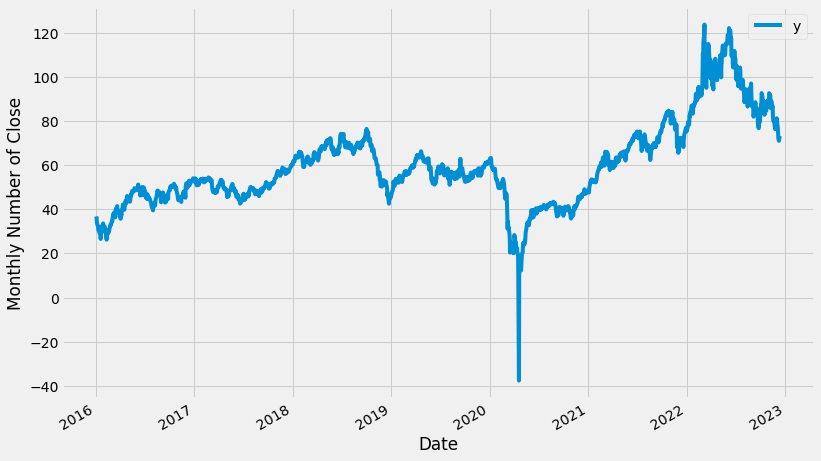

In [20]:
ax = dataset.set_index('ds').plot(figsize=(12, 8)) 
ax.set_ylabel('Monthly Number of Close') 
ax.set_xlabel('Date')  
plt.show(); 

In [21]:
my_model = Prophet(interval_width=0.95)

In [22]:
my_model.fit(train) 

17:33:38 - cmdstanpy - INFO - Chain [1] start processing
17:33:39 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future_dates = my_model.make_future_dataframe(periods=len(test), freq='D') 
future_dates.tail()

,ds
1744,2022-09-21
1745,2022-09-22
1746,2022-09-23
1747,2022-09-24
1748,2022-09-25


In [24]:
#merge regressors
future_dates = pd.concat([future_dates, dataset.iloc[:,1:]],
                   axis = 1)
future_dates.tail(5)

,ds,y
1744,2022-09-21,74.25
1745,2022-09-22,72.01
1746,2022-09-23,71.46
1747,2022-09-24,71.02
1748,2022-09-25,73.17


In [25]:
#forecast
forecast = my_model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,31.351765,19.507231,40.837177,31.351765,31.351765,-1.363568,-1.363568,-1.363568,-0.501234,-0.501234,-0.501234,-0.862333,-0.862333,-0.862333,0.0,0.0,0.0,29.988197
1,2016-01-05,31.439394,19.785017,41.169725,31.439394,31.439394,-1.014411,-1.014411,-1.014411,-0.308374,-0.308374,-0.308374,-0.706037,-0.706037,-0.706037,0.0,0.0,0.0,30.424982
2,2016-01-06,31.527022,20.564403,41.073961,31.527022,31.527022,-1.009674,-1.009674,-1.009674,-0.462942,-0.462942,-0.462942,-0.546732,-0.546732,-0.546732,0.0,0.0,0.0,30.517348
3,2016-01-07,31.614651,19.957722,41.070391,31.614651,31.614651,-0.758356,-0.758356,-0.758356,-0.372567,-0.372567,-0.372567,-0.385789,-0.385789,-0.385789,0.0,0.0,0.0,30.856295
4,2016-01-08,31.702279,19.836414,42.304084,31.702279,31.702279,-0.309993,-0.309993,-0.309993,-0.085255,-0.085255,-0.085255,-0.224738,-0.224738,-0.224738,0.0,0.0,0.0,31.392286


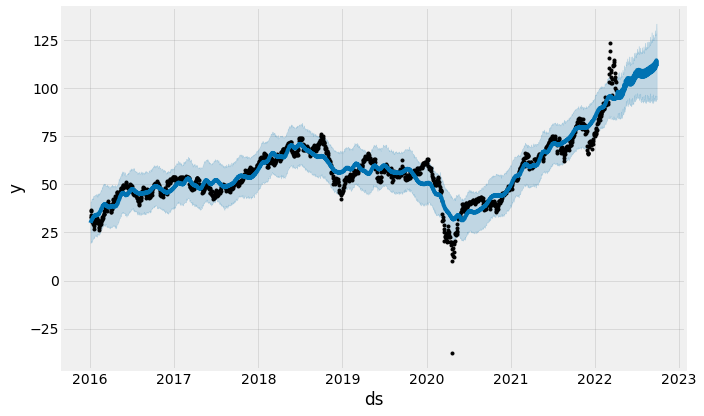

In [26]:
my_model.plot(forecast,uncertainty=True);

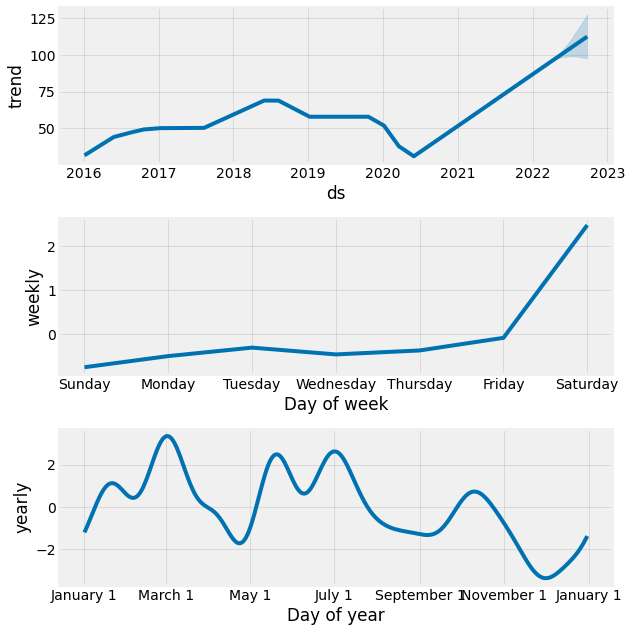

In [27]:
my_model.plot_components(forecast);

In [30]:
#predictions
predictions_prophet = forecast.yhat[-175:].rename("prophet")
predictions_prophet[:5]

1574    95.084122
1575    95.321406
1576    95.204578
1577    95.325168
1578    95.634697
Name: prophet, dtype: float64

In [31]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test['y'], predictions_prophet),0))
print(round(np.sqrt(mean_squared_error(test['y'], predictions_prophet)), 0))

16.0
18.0


In [32]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [33]:
mape(test['y'],predictions_prophet)

0.18008045878280712

In [34]:
#CV
from prophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, initial='540 days', period='1 days', horizon = '30 days')


  0%|          | 0/1712 [00:00<?, ?it/s]

17:34:09 - cmdstanpy - INFO - Chain [1] start processing
17:34:10 - cmdstanpy - INFO - Chain [1] done processing
17:34:10 - cmdstanpy - INFO - Chain [1] start processing
17:34:10 - cmdstanpy - INFO - Chain [1] done processing
17:34:11 - cmdstanpy - INFO - Chain [1] start processing
17:34:11 - cmdstanpy - INFO - Chain [1] done processing
17:34:11 - cmdstanpy - INFO - Chain [1] start processing
17:34:11 - cmdstanpy - INFO - Chain [1] done processing
17:34:12 - cmdstanpy - INFO - Chain [1] start processing
17:34:12 - cmdstanpy - INFO - Chain [1] done processing
17:34:12 - cmdstanpy - INFO - Chain [1] start processing
17:34:12 - cmdstanpy - INFO - Chain [1] done processing
17:34:13 - cmdstanpy - INFO - Chain [1] start processing
17:34:13 - cmdstanpy - INFO - Chain [1] done processing
17:34:13 - cmdstanpy - INFO - Chain [1] start processing
17:34:13 - cmdstanpy - INFO - Chain [1] done processing
17:34:14 - cmdstanpy - INFO - Chain [1] start processing
17:34:14 - cmdstanpy - INFO - Chain [1]

17:34:50 - cmdstanpy - INFO - Chain [1] done processing
17:34:51 - cmdstanpy - INFO - Chain [1] start processing
17:34:51 - cmdstanpy - INFO - Chain [1] done processing
17:34:51 - cmdstanpy - INFO - Chain [1] start processing
17:34:51 - cmdstanpy - INFO - Chain [1] done processing
17:34:52 - cmdstanpy - INFO - Chain [1] start processing
17:34:52 - cmdstanpy - INFO - Chain [1] done processing
17:34:52 - cmdstanpy - INFO - Chain [1] start processing
17:34:53 - cmdstanpy - INFO - Chain [1] done processing
17:34:53 - cmdstanpy - INFO - Chain [1] start processing
17:34:53 - cmdstanpy - INFO - Chain [1] done processing
17:34:54 - cmdstanpy - INFO - Chain [1] start processing
17:34:54 - cmdstanpy - INFO - Chain [1] done processing
17:34:54 - cmdstanpy - INFO - Chain [1] start processing
17:34:54 - cmdstanpy - INFO - Chain [1] done processing
17:34:55 - cmdstanpy - INFO - Chain [1] start processing
17:34:55 - cmdstanpy - INFO - Chain [1] done processing
17:34:55 - cmdstanpy - INFO - Chain [1] 

17:35:32 - cmdstanpy - INFO - Chain [1] done processing
17:35:33 - cmdstanpy - INFO - Chain [1] start processing
17:35:33 - cmdstanpy - INFO - Chain [1] done processing
17:35:34 - cmdstanpy - INFO - Chain [1] start processing
17:35:34 - cmdstanpy - INFO - Chain [1] done processing
17:35:34 - cmdstanpy - INFO - Chain [1] start processing
17:35:34 - cmdstanpy - INFO - Chain [1] done processing
17:35:35 - cmdstanpy - INFO - Chain [1] start processing
17:35:35 - cmdstanpy - INFO - Chain [1] done processing
17:35:35 - cmdstanpy - INFO - Chain [1] start processing
17:35:35 - cmdstanpy - INFO - Chain [1] done processing
17:35:36 - cmdstanpy - INFO - Chain [1] start processing
17:35:36 - cmdstanpy - INFO - Chain [1] done processing
17:35:36 - cmdstanpy - INFO - Chain [1] start processing
17:35:37 - cmdstanpy - INFO - Chain [1] done processing
17:35:37 - cmdstanpy - INFO - Chain [1] start processing
17:35:37 - cmdstanpy - INFO - Chain [1] done processing
17:35:38 - cmdstanpy - INFO - Chain [1] 

17:36:16 - cmdstanpy - INFO - Chain [1] done processing
17:36:16 - cmdstanpy - INFO - Chain [1] start processing
17:36:16 - cmdstanpy - INFO - Chain [1] done processing
17:36:17 - cmdstanpy - INFO - Chain [1] start processing
17:36:17 - cmdstanpy - INFO - Chain [1] done processing
17:36:18 - cmdstanpy - INFO - Chain [1] start processing
17:36:18 - cmdstanpy - INFO - Chain [1] done processing
17:36:18 - cmdstanpy - INFO - Chain [1] start processing
17:36:18 - cmdstanpy - INFO - Chain [1] done processing
17:36:19 - cmdstanpy - INFO - Chain [1] start processing
17:36:19 - cmdstanpy - INFO - Chain [1] done processing
17:36:19 - cmdstanpy - INFO - Chain [1] start processing
17:36:19 - cmdstanpy - INFO - Chain [1] done processing
17:36:20 - cmdstanpy - INFO - Chain [1] start processing
17:36:20 - cmdstanpy - INFO - Chain [1] done processing
17:36:21 - cmdstanpy - INFO - Chain [1] start processing
17:36:21 - cmdstanpy - INFO - Chain [1] done processing
17:36:21 - cmdstanpy - INFO - Chain [1] 

17:37:00 - cmdstanpy - INFO - Chain [1] done processing
17:37:01 - cmdstanpy - INFO - Chain [1] start processing
17:37:01 - cmdstanpy - INFO - Chain [1] done processing
17:37:01 - cmdstanpy - INFO - Chain [1] start processing
17:37:01 - cmdstanpy - INFO - Chain [1] done processing
17:37:02 - cmdstanpy - INFO - Chain [1] start processing
17:37:02 - cmdstanpy - INFO - Chain [1] done processing
17:37:03 - cmdstanpy - INFO - Chain [1] start processing
17:37:03 - cmdstanpy - INFO - Chain [1] done processing
17:37:04 - cmdstanpy - INFO - Chain [1] start processing
17:37:04 - cmdstanpy - INFO - Chain [1] done processing
17:37:04 - cmdstanpy - INFO - Chain [1] start processing
17:37:05 - cmdstanpy - INFO - Chain [1] done processing
17:37:05 - cmdstanpy - INFO - Chain [1] start processing
17:37:05 - cmdstanpy - INFO - Chain [1] done processing
17:37:06 - cmdstanpy - INFO - Chain [1] start processing
17:37:06 - cmdstanpy - INFO - Chain [1] done processing
17:37:06 - cmdstanpy - INFO - Chain [1] 

17:37:47 - cmdstanpy - INFO - Chain [1] done processing
17:37:48 - cmdstanpy - INFO - Chain [1] start processing
17:37:48 - cmdstanpy - INFO - Chain [1] done processing
17:37:48 - cmdstanpy - INFO - Chain [1] start processing
17:37:48 - cmdstanpy - INFO - Chain [1] done processing
17:37:49 - cmdstanpy - INFO - Chain [1] start processing
17:37:49 - cmdstanpy - INFO - Chain [1] done processing
17:37:49 - cmdstanpy - INFO - Chain [1] start processing
17:37:50 - cmdstanpy - INFO - Chain [1] done processing
17:37:50 - cmdstanpy - INFO - Chain [1] start processing
17:37:50 - cmdstanpy - INFO - Chain [1] done processing
17:37:51 - cmdstanpy - INFO - Chain [1] start processing
17:37:51 - cmdstanpy - INFO - Chain [1] done processing
17:37:51 - cmdstanpy - INFO - Chain [1] start processing
17:37:52 - cmdstanpy - INFO - Chain [1] done processing
17:37:52 - cmdstanpy - INFO - Chain [1] start processing
17:37:52 - cmdstanpy - INFO - Chain [1] done processing
17:37:53 - cmdstanpy - INFO - Chain [1] 

17:38:35 - cmdstanpy - INFO - Chain [1] done processing
17:38:36 - cmdstanpy - INFO - Chain [1] start processing
17:38:36 - cmdstanpy - INFO - Chain [1] done processing
17:38:37 - cmdstanpy - INFO - Chain [1] start processing
17:38:37 - cmdstanpy - INFO - Chain [1] done processing
17:38:37 - cmdstanpy - INFO - Chain [1] start processing
17:38:37 - cmdstanpy - INFO - Chain [1] done processing
17:38:38 - cmdstanpy - INFO - Chain [1] start processing
17:38:38 - cmdstanpy - INFO - Chain [1] done processing
17:38:39 - cmdstanpy - INFO - Chain [1] start processing
17:38:39 - cmdstanpy - INFO - Chain [1] done processing
17:38:39 - cmdstanpy - INFO - Chain [1] start processing
17:38:39 - cmdstanpy - INFO - Chain [1] done processing
17:38:40 - cmdstanpy - INFO - Chain [1] start processing
17:38:40 - cmdstanpy - INFO - Chain [1] done processing
17:38:41 - cmdstanpy - INFO - Chain [1] start processing
17:38:41 - cmdstanpy - INFO - Chain [1] done processing
17:38:41 - cmdstanpy - INFO - Chain [1] 

17:39:27 - cmdstanpy - INFO - Chain [1] done processing
17:39:27 - cmdstanpy - INFO - Chain [1] start processing
17:39:27 - cmdstanpy - INFO - Chain [1] done processing
17:39:28 - cmdstanpy - INFO - Chain [1] start processing
17:39:28 - cmdstanpy - INFO - Chain [1] done processing
17:39:29 - cmdstanpy - INFO - Chain [1] start processing
17:39:29 - cmdstanpy - INFO - Chain [1] done processing
17:39:29 - cmdstanpy - INFO - Chain [1] start processing
17:39:30 - cmdstanpy - INFO - Chain [1] done processing
17:39:30 - cmdstanpy - INFO - Chain [1] start processing
17:39:30 - cmdstanpy - INFO - Chain [1] done processing
17:39:31 - cmdstanpy - INFO - Chain [1] start processing
17:39:31 - cmdstanpy - INFO - Chain [1] done processing
17:39:32 - cmdstanpy - INFO - Chain [1] start processing
17:39:32 - cmdstanpy - INFO - Chain [1] done processing
17:39:32 - cmdstanpy - INFO - Chain [1] start processing
17:39:32 - cmdstanpy - INFO - Chain [1] done processing
17:39:33 - cmdstanpy - INFO - Chain [1] 

17:40:22 - cmdstanpy - INFO - Chain [1] done processing
17:40:22 - cmdstanpy - INFO - Chain [1] start processing
17:40:22 - cmdstanpy - INFO - Chain [1] done processing
17:40:23 - cmdstanpy - INFO - Chain [1] start processing
17:40:23 - cmdstanpy - INFO - Chain [1] done processing
17:40:23 - cmdstanpy - INFO - Chain [1] start processing
17:40:24 - cmdstanpy - INFO - Chain [1] done processing
17:40:24 - cmdstanpy - INFO - Chain [1] start processing
17:40:25 - cmdstanpy - INFO - Chain [1] done processing
17:40:25 - cmdstanpy - INFO - Chain [1] start processing
17:40:25 - cmdstanpy - INFO - Chain [1] done processing
17:40:26 - cmdstanpy - INFO - Chain [1] start processing
17:40:26 - cmdstanpy - INFO - Chain [1] done processing
17:40:26 - cmdstanpy - INFO - Chain [1] start processing
17:40:27 - cmdstanpy - INFO - Chain [1] done processing
17:40:27 - cmdstanpy - INFO - Chain [1] start processing
17:40:27 - cmdstanpy - INFO - Chain [1] done processing
17:40:28 - cmdstanpy - INFO - Chain [1] 

17:41:14 - cmdstanpy - INFO - Chain [1] done processing
17:41:15 - cmdstanpy - INFO - Chain [1] start processing
17:41:15 - cmdstanpy - INFO - Chain [1] done processing
17:41:16 - cmdstanpy - INFO - Chain [1] start processing
17:41:16 - cmdstanpy - INFO - Chain [1] done processing
17:41:16 - cmdstanpy - INFO - Chain [1] start processing
17:41:17 - cmdstanpy - INFO - Chain [1] done processing
17:41:17 - cmdstanpy - INFO - Chain [1] start processing
17:41:17 - cmdstanpy - INFO - Chain [1] done processing
17:41:18 - cmdstanpy - INFO - Chain [1] start processing
17:41:18 - cmdstanpy - INFO - Chain [1] done processing
17:41:19 - cmdstanpy - INFO - Chain [1] start processing
17:41:19 - cmdstanpy - INFO - Chain [1] done processing
17:41:19 - cmdstanpy - INFO - Chain [1] start processing
17:41:20 - cmdstanpy - INFO - Chain [1] done processing
17:41:20 - cmdstanpy - INFO - Chain [1] start processing
17:41:20 - cmdstanpy - INFO - Chain [1] done processing
17:41:21 - cmdstanpy - INFO - Chain [1] 

17:42:06 - cmdstanpy - INFO - Chain [1] done processing
17:42:07 - cmdstanpy - INFO - Chain [1] start processing
17:42:07 - cmdstanpy - INFO - Chain [1] done processing
17:42:07 - cmdstanpy - INFO - Chain [1] start processing
17:42:08 - cmdstanpy - INFO - Chain [1] done processing
17:42:08 - cmdstanpy - INFO - Chain [1] start processing
17:42:08 - cmdstanpy - INFO - Chain [1] done processing
17:42:09 - cmdstanpy - INFO - Chain [1] start processing
17:42:09 - cmdstanpy - INFO - Chain [1] done processing
17:42:10 - cmdstanpy - INFO - Chain [1] start processing
17:42:10 - cmdstanpy - INFO - Chain [1] done processing
17:42:10 - cmdstanpy - INFO - Chain [1] start processing
17:42:11 - cmdstanpy - INFO - Chain [1] done processing
17:42:11 - cmdstanpy - INFO - Chain [1] start processing
17:42:11 - cmdstanpy - INFO - Chain [1] done processing
17:42:12 - cmdstanpy - INFO - Chain [1] start processing
17:42:12 - cmdstanpy - INFO - Chain [1] done processing
17:42:12 - cmdstanpy - INFO - Chain [1] 

17:43:01 - cmdstanpy - INFO - Chain [1] done processing
17:43:02 - cmdstanpy - INFO - Chain [1] start processing
17:43:02 - cmdstanpy - INFO - Chain [1] done processing
17:43:03 - cmdstanpy - INFO - Chain [1] start processing
17:43:03 - cmdstanpy - INFO - Chain [1] done processing
17:43:04 - cmdstanpy - INFO - Chain [1] start processing
17:43:04 - cmdstanpy - INFO - Chain [1] done processing
17:43:04 - cmdstanpy - INFO - Chain [1] start processing
17:43:05 - cmdstanpy - INFO - Chain [1] done processing
17:43:05 - cmdstanpy - INFO - Chain [1] start processing
17:43:05 - cmdstanpy - INFO - Chain [1] done processing
17:43:06 - cmdstanpy - INFO - Chain [1] start processing
17:43:06 - cmdstanpy - INFO - Chain [1] done processing
17:43:07 - cmdstanpy - INFO - Chain [1] start processing
17:43:07 - cmdstanpy - INFO - Chain [1] done processing
17:43:08 - cmdstanpy - INFO - Chain [1] start processing
17:43:08 - cmdstanpy - INFO - Chain [1] done processing
17:43:09 - cmdstanpy - INFO - Chain [1] 

17:44:02 - cmdstanpy - INFO - Chain [1] done processing
17:44:02 - cmdstanpy - INFO - Chain [1] start processing
17:44:02 - cmdstanpy - INFO - Chain [1] done processing
17:44:03 - cmdstanpy - INFO - Chain [1] start processing
17:44:03 - cmdstanpy - INFO - Chain [1] done processing
17:44:04 - cmdstanpy - INFO - Chain [1] start processing
17:44:04 - cmdstanpy - INFO - Chain [1] done processing
17:44:05 - cmdstanpy - INFO - Chain [1] start processing
17:44:05 - cmdstanpy - INFO - Chain [1] done processing
17:44:05 - cmdstanpy - INFO - Chain [1] start processing
17:44:06 - cmdstanpy - INFO - Chain [1] done processing
17:44:06 - cmdstanpy - INFO - Chain [1] start processing
17:44:07 - cmdstanpy - INFO - Chain [1] done processing
17:44:07 - cmdstanpy - INFO - Chain [1] start processing
17:44:07 - cmdstanpy - INFO - Chain [1] done processing
17:44:08 - cmdstanpy - INFO - Chain [1] start processing
17:44:08 - cmdstanpy - INFO - Chain [1] done processing
17:44:09 - cmdstanpy - INFO - Chain [1] 

17:45:04 - cmdstanpy - INFO - Chain [1] done processing
17:45:05 - cmdstanpy - INFO - Chain [1] start processing
17:45:05 - cmdstanpy - INFO - Chain [1] done processing
17:45:06 - cmdstanpy - INFO - Chain [1] start processing
17:45:06 - cmdstanpy - INFO - Chain [1] done processing
17:45:07 - cmdstanpy - INFO - Chain [1] start processing
17:45:07 - cmdstanpy - INFO - Chain [1] done processing
17:45:07 - cmdstanpy - INFO - Chain [1] start processing
17:45:08 - cmdstanpy - INFO - Chain [1] done processing
17:45:08 - cmdstanpy - INFO - Chain [1] start processing
17:45:08 - cmdstanpy - INFO - Chain [1] done processing
17:45:09 - cmdstanpy - INFO - Chain [1] start processing
17:45:09 - cmdstanpy - INFO - Chain [1] done processing
17:45:10 - cmdstanpy - INFO - Chain [1] start processing
17:45:10 - cmdstanpy - INFO - Chain [1] done processing
17:45:11 - cmdstanpy - INFO - Chain [1] start processing
17:45:11 - cmdstanpy - INFO - Chain [1] done processing
17:45:11 - cmdstanpy - INFO - Chain [1] 

17:46:05 - cmdstanpy - INFO - Chain [1] done processing
17:46:06 - cmdstanpy - INFO - Chain [1] start processing
17:46:06 - cmdstanpy - INFO - Chain [1] done processing
17:46:06 - cmdstanpy - INFO - Chain [1] start processing
17:46:07 - cmdstanpy - INFO - Chain [1] done processing
17:46:07 - cmdstanpy - INFO - Chain [1] start processing
17:46:08 - cmdstanpy - INFO - Chain [1] done processing
17:46:08 - cmdstanpy - INFO - Chain [1] start processing
17:46:08 - cmdstanpy - INFO - Chain [1] done processing
17:46:09 - cmdstanpy - INFO - Chain [1] start processing
17:46:09 - cmdstanpy - INFO - Chain [1] done processing
17:46:10 - cmdstanpy - INFO - Chain [1] start processing
17:46:10 - cmdstanpy - INFO - Chain [1] done processing
17:46:10 - cmdstanpy - INFO - Chain [1] start processing
17:46:11 - cmdstanpy - INFO - Chain [1] done processing
17:46:11 - cmdstanpy - INFO - Chain [1] start processing
17:46:11 - cmdstanpy - INFO - Chain [1] done processing
17:46:12 - cmdstanpy - INFO - Chain [1] 

17:47:00 - cmdstanpy - INFO - Chain [1] done processing
17:47:00 - cmdstanpy - INFO - Chain [1] start processing
17:47:01 - cmdstanpy - INFO - Chain [1] done processing
17:47:01 - cmdstanpy - INFO - Chain [1] start processing
17:47:01 - cmdstanpy - INFO - Chain [1] done processing
17:47:02 - cmdstanpy - INFO - Chain [1] start processing
17:47:02 - cmdstanpy - INFO - Chain [1] done processing
17:47:02 - cmdstanpy - INFO - Chain [1] start processing
17:47:03 - cmdstanpy - INFO - Chain [1] done processing
17:47:03 - cmdstanpy - INFO - Chain [1] start processing
17:47:03 - cmdstanpy - INFO - Chain [1] done processing
17:47:04 - cmdstanpy - INFO - Chain [1] start processing
17:47:04 - cmdstanpy - INFO - Chain [1] done processing
17:47:05 - cmdstanpy - INFO - Chain [1] start processing
17:47:05 - cmdstanpy - INFO - Chain [1] done processing
17:47:05 - cmdstanpy - INFO - Chain [1] start processing
17:47:05 - cmdstanpy - INFO - Chain [1] done processing
17:47:06 - cmdstanpy - INFO - Chain [1] 

17:47:51 - cmdstanpy - INFO - Chain [1] done processing
17:47:51 - cmdstanpy - INFO - Chain [1] start processing
17:47:51 - cmdstanpy - INFO - Chain [1] done processing
17:47:52 - cmdstanpy - INFO - Chain [1] start processing
17:47:52 - cmdstanpy - INFO - Chain [1] done processing
17:47:53 - cmdstanpy - INFO - Chain [1] start processing
17:47:53 - cmdstanpy - INFO - Chain [1] done processing
17:47:53 - cmdstanpy - INFO - Chain [1] start processing
17:47:53 - cmdstanpy - INFO - Chain [1] done processing
17:47:54 - cmdstanpy - INFO - Chain [1] start processing
17:47:54 - cmdstanpy - INFO - Chain [1] done processing
17:47:55 - cmdstanpy - INFO - Chain [1] start processing
17:47:55 - cmdstanpy - INFO - Chain [1] done processing
17:47:55 - cmdstanpy - INFO - Chain [1] start processing
17:47:55 - cmdstanpy - INFO - Chain [1] done processing
17:47:56 - cmdstanpy - INFO - Chain [1] start processing
17:47:56 - cmdstanpy - INFO - Chain [1] done processing
17:47:57 - cmdstanpy - INFO - Chain [1] 

17:48:42 - cmdstanpy - INFO - Chain [1] done processing
17:48:43 - cmdstanpy - INFO - Chain [1] start processing
17:48:43 - cmdstanpy - INFO - Chain [1] done processing
17:48:43 - cmdstanpy - INFO - Chain [1] start processing
17:48:44 - cmdstanpy - INFO - Chain [1] done processing
17:48:44 - cmdstanpy - INFO - Chain [1] start processing
17:48:44 - cmdstanpy - INFO - Chain [1] done processing
17:48:45 - cmdstanpy - INFO - Chain [1] start processing
17:48:45 - cmdstanpy - INFO - Chain [1] done processing
17:48:46 - cmdstanpy - INFO - Chain [1] start processing
17:48:46 - cmdstanpy - INFO - Chain [1] done processing
17:48:46 - cmdstanpy - INFO - Chain [1] start processing
17:48:47 - cmdstanpy - INFO - Chain [1] done processing
17:48:47 - cmdstanpy - INFO - Chain [1] start processing
17:48:47 - cmdstanpy - INFO - Chain [1] done processing
17:48:48 - cmdstanpy - INFO - Chain [1] start processing
17:48:48 - cmdstanpy - INFO - Chain [1] done processing
17:48:48 - cmdstanpy - INFO - Chain [1] 

17:49:32 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing
17:49:33 - cmdstanpy - INFO - Chain [1] done processing
17:49:34 - cmdstanpy - INFO - Chain [1] start processing
17:49:34 - cmdstanpy - INFO - Chain [1] done processing
17:49:34 - cmdstanpy - INFO - Chain [1] start processing
17:49:34 - cmdstanpy - INFO - Chain [1] done processing
17:49:35 - cmdstanpy - INFO - Chain [1] start processing
17:49:35 - cmdstanpy - INFO - Chain [1] done processing
17:49:36 - cmdstanpy - INFO - Chain [1] start processing
17:49:36 - cmdstanpy - INFO - Chain [1] done processing
17:49:36 - cmdstanpy - INFO - Chain [1] start processing
17:49:36 - cmdstanpy - INFO - Chain [1] done processing
17:49:37 - cmdstanpy - INFO - Chain [1] start processing
17:49:37 - cmdstanpy - INFO - Chain [1] done processing
17:49:38 - cmdstanpy - INFO - Chain [1] start processing
17:49:38 - cmdstanpy - INFO - Chain [1] done processing
17:49:38 - cmdstanpy - INFO - Chain [1] 

17:50:28 - cmdstanpy - INFO - Chain [1] done processing
17:50:28 - cmdstanpy - INFO - Chain [1] start processing
17:50:29 - cmdstanpy - INFO - Chain [1] done processing
17:50:29 - cmdstanpy - INFO - Chain [1] start processing
17:50:30 - cmdstanpy - INFO - Chain [1] done processing
17:50:30 - cmdstanpy - INFO - Chain [1] start processing
17:50:31 - cmdstanpy - INFO - Chain [1] done processing
17:50:31 - cmdstanpy - INFO - Chain [1] start processing
17:50:31 - cmdstanpy - INFO - Chain [1] done processing
17:50:32 - cmdstanpy - INFO - Chain [1] start processing
17:50:32 - cmdstanpy - INFO - Chain [1] done processing
17:50:33 - cmdstanpy - INFO - Chain [1] start processing
17:50:33 - cmdstanpy - INFO - Chain [1] done processing
17:50:34 - cmdstanpy - INFO - Chain [1] start processing
17:50:34 - cmdstanpy - INFO - Chain [1] done processing
17:50:35 - cmdstanpy - INFO - Chain [1] start processing
17:50:35 - cmdstanpy - INFO - Chain [1] done processing
17:50:35 - cmdstanpy - INFO - Chain [1] 

17:51:30 - cmdstanpy - INFO - Chain [1] done processing
17:51:31 - cmdstanpy - INFO - Chain [1] start processing
17:51:31 - cmdstanpy - INFO - Chain [1] done processing
17:51:32 - cmdstanpy - INFO - Chain [1] start processing
17:51:32 - cmdstanpy - INFO - Chain [1] done processing
17:51:33 - cmdstanpy - INFO - Chain [1] start processing
17:51:33 - cmdstanpy - INFO - Chain [1] done processing
17:51:33 - cmdstanpy - INFO - Chain [1] start processing
17:51:34 - cmdstanpy - INFO - Chain [1] done processing
17:51:34 - cmdstanpy - INFO - Chain [1] start processing
17:51:34 - cmdstanpy - INFO - Chain [1] done processing
17:51:35 - cmdstanpy - INFO - Chain [1] start processing
17:51:35 - cmdstanpy - INFO - Chain [1] done processing
17:51:36 - cmdstanpy - INFO - Chain [1] start processing
17:51:36 - cmdstanpy - INFO - Chain [1] done processing
17:51:37 - cmdstanpy - INFO - Chain [1] start processing
17:51:37 - cmdstanpy - INFO - Chain [1] done processing
17:51:37 - cmdstanpy - INFO - Chain [1] 

17:52:36 - cmdstanpy - INFO - Chain [1] done processing
17:52:36 - cmdstanpy - INFO - Chain [1] start processing
17:52:37 - cmdstanpy - INFO - Chain [1] done processing
17:52:37 - cmdstanpy - INFO - Chain [1] start processing
17:52:38 - cmdstanpy - INFO - Chain [1] done processing
17:52:38 - cmdstanpy - INFO - Chain [1] start processing
17:52:38 - cmdstanpy - INFO - Chain [1] done processing
17:52:39 - cmdstanpy - INFO - Chain [1] start processing
17:52:39 - cmdstanpy - INFO - Chain [1] done processing
17:52:40 - cmdstanpy - INFO - Chain [1] start processing
17:52:40 - cmdstanpy - INFO - Chain [1] done processing
17:52:41 - cmdstanpy - INFO - Chain [1] start processing
17:52:41 - cmdstanpy - INFO - Chain [1] done processing
17:52:42 - cmdstanpy - INFO - Chain [1] start processing
17:52:42 - cmdstanpy - INFO - Chain [1] done processing
17:52:42 - cmdstanpy - INFO - Chain [1] start processing
17:52:43 - cmdstanpy - INFO - Chain [1] done processing
17:52:43 - cmdstanpy - INFO - Chain [1] 

17:53:45 - cmdstanpy - INFO - Chain [1] done processing
17:53:45 - cmdstanpy - INFO - Chain [1] start processing
17:53:46 - cmdstanpy - INFO - Chain [1] done processing
17:53:46 - cmdstanpy - INFO - Chain [1] start processing
17:53:47 - cmdstanpy - INFO - Chain [1] done processing
17:53:47 - cmdstanpy - INFO - Chain [1] start processing
17:53:48 - cmdstanpy - INFO - Chain [1] done processing
17:53:48 - cmdstanpy - INFO - Chain [1] start processing
17:53:49 - cmdstanpy - INFO - Chain [1] done processing
17:53:49 - cmdstanpy - INFO - Chain [1] start processing
17:53:50 - cmdstanpy - INFO - Chain [1] done processing
17:53:50 - cmdstanpy - INFO - Chain [1] start processing
17:53:51 - cmdstanpy - INFO - Chain [1] done processing
17:53:51 - cmdstanpy - INFO - Chain [1] start processing
17:53:52 - cmdstanpy - INFO - Chain [1] done processing
17:53:52 - cmdstanpy - INFO - Chain [1] start processing
17:53:53 - cmdstanpy - INFO - Chain [1] done processing
17:53:53 - cmdstanpy - INFO - Chain [1] 

17:54:52 - cmdstanpy - INFO - Chain [1] done processing
17:54:53 - cmdstanpy - INFO - Chain [1] start processing
17:54:53 - cmdstanpy - INFO - Chain [1] done processing
17:54:54 - cmdstanpy - INFO - Chain [1] start processing
17:54:54 - cmdstanpy - INFO - Chain [1] done processing
17:54:55 - cmdstanpy - INFO - Chain [1] start processing
17:54:55 - cmdstanpy - INFO - Chain [1] done processing
17:54:56 - cmdstanpy - INFO - Chain [1] start processing
17:54:56 - cmdstanpy - INFO - Chain [1] done processing
17:54:57 - cmdstanpy - INFO - Chain [1] start processing
17:54:58 - cmdstanpy - INFO - Chain [1] done processing
17:54:58 - cmdstanpy - INFO - Chain [1] start processing
17:54:59 - cmdstanpy - INFO - Chain [1] done processing
17:54:59 - cmdstanpy - INFO - Chain [1] start processing
17:55:00 - cmdstanpy - INFO - Chain [1] done processing
17:55:00 - cmdstanpy - INFO - Chain [1] start processing
17:55:01 - cmdstanpy - INFO - Chain [1] done processing
17:55:02 - cmdstanpy - INFO - Chain [1] 

In [35]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-28,42.061556,39.108643,45.132003,44.93,2017-06-27
1,2017-06-29,41.796714,38.949187,44.703425,46.04,2017-06-27
2,2017-07-03,40.786977,37.781654,43.662408,47.07,2017-06-27
3,2017-07-04,40.374227,37.268400,43.416290,45.13,2017-06-27
4,2017-07-05,39.986514,36.987209,42.923723,45.52,2017-06-27


In [36]:
dataset.head()

,ds,y
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16


In [37]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,73.559825,8.576702,6.061614,0.138260,0.066912,0.127916,0.712322
1,5 days,77.040966,8.777298,6.221374,0.141458,0.069454,0.130914,0.700590
2,6 days,80.463544,8.970147,6.374982,0.144563,0.070473,0.133820,0.686713
3,7 days,84.125341,9.171987,6.534482,0.147936,0.071558,0.136882,0.673057
4,8 days,88.624670,9.414068,6.728255,0.152197,0.074540,0.140690,0.654439


C:\Users\Quang Anh\anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Quang Anh\anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


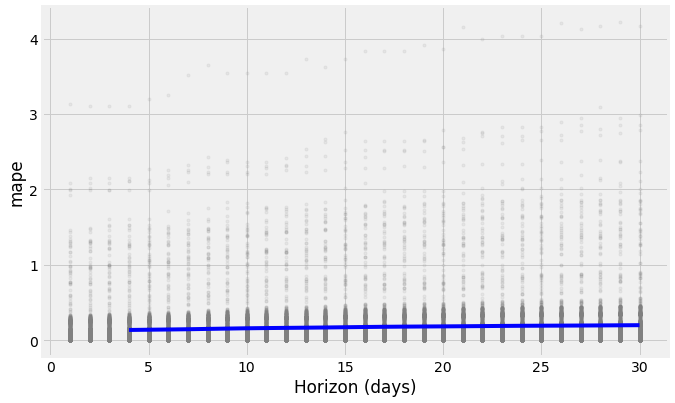

In [38]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [39]:
from dask.distributed import Client



client = Client()  # connect to the cluster

df_cv = cross_validation(my_model, initial='360 days', period='1 days', horizon='30 days',

                         parallel="processes")

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


In [40]:
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': np.arange(5,10,5)
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(**params).fit(dataset)  # Fit model with given params
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

18:06:00 - cmdstanpy - INFO - Chain [1] start processing
18:06:00 - cmdstanpy - INFO - Chain [1] done processing
18:06:00 - cmdstanpy - INFO - Chain [1] start processing
18:06:00 - cmdstanpy - INFO - Chain [1] done processing
18:06:01 - cmdstanpy - INFO - Chain [1] start processing
18:06:01 - cmdstanpy - INFO - Chain [1] done processing
18:06:01 - cmdstanpy - INFO - Chain [1] start processing
18:06:01 - cmdstanpy - INFO - Chain [1] done processing
18:06:02 - cmdstanpy - INFO - Chain [1] start processing
18:06:02 - cmdstanpy - INFO - Chain [1] done processing
18:06:02 - cmdstanpy - INFO - Chain [1] start processing
18:06:02 - cmdstanpy - INFO - Chain [1] done processing
18:06:03 - cmdstanpy - INFO - Chain [1] start processing
18:06:03 - cmdstanpy - INFO - Chain [1] done processing
18:06:03 - cmdstanpy - INFO - Chain [1] start processing
18:06:03 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1]

    changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.001                     0.01                     5   
1                     0.001                     0.10                     5   
2                     0.001                     1.00                     5   
3                     0.001                    10.00                     5   
4                     0.010                     0.01                     5   
5                     0.010                     0.10                     5   
6                     0.010                     1.00                     5   
7                     0.010                    10.00                     5   
8                     0.100                     0.01                     5   
9                     0.100                     0.10                     5   
10                    0.100                     1.00                     5   
11                    0.100                    10.00            

In [41]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 5}


In [42]:
#build model
model = Prophet(growth = "linear",
          yearly_seasonality = True,
          weekly_seasonality = True,
          daily_seasonality = False,
          seasonality_mode = "multiplicative",
          seasonality_prior_scale = best_params['seasonality_prior_scale'],
          holidays_prior_scale = best_params['holidays_prior_scale'],
          changepoint_prior_scale = best_params['changepoint_prior_scale'])
model.fit(train)

18:06:25 - cmdstanpy - INFO - Chain [1] start processing
18:06:25 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future_dates


,ds,y
0,2016-01-04,36.76
1,2016-01-05,35.97
2,2016-01-06,33.97
3,2016-01-07,33.27
4,2016-01-08,33.16
...,...,...
1744,2022-09-21,74.25
1745,2022-09-22,72.01
1746,2022-09-23,71.46
1747,2022-09-24,71.02


In [45]:
#Create Future Dataframe
future_dates = my_model.make_future_dataframe(periods=175, freq='D')
future_dates = pd.concat([future_dates, dataset.iloc[:,1:]],
                   axis = 1)
future_dates.tail(1)


,ds,y
1748,2022-09-25,73.17


In [46]:
#forecast
forecast = my_model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,31.351765,19.500997,40.339834,31.351765,31.351765,-1.363568,-1.363568,-1.363568,-0.501234,-0.501234,-0.501234,-0.862333,-0.862333,-0.862333,0.0,0.0,0.0,29.988197
1,2016-01-05,31.439394,19.935245,41.368096,31.439394,31.439394,-1.014411,-1.014411,-1.014411,-0.308374,-0.308374,-0.308374,-0.706037,-0.706037,-0.706037,0.0,0.0,0.0,30.424982
2,2016-01-06,31.527022,19.762679,41.061121,31.527022,31.527022,-1.009674,-1.009674,-1.009674,-0.462942,-0.462942,-0.462942,-0.546732,-0.546732,-0.546732,0.0,0.0,0.0,30.517348
3,2016-01-07,31.614651,21.009099,41.807774,31.614651,31.614651,-0.758356,-0.758356,-0.758356,-0.372567,-0.372567,-0.372567,-0.385789,-0.385789,-0.385789,0.0,0.0,0.0,30.856295
4,2016-01-08,31.702279,21.165754,42.633808,31.702279,31.702279,-0.309993,-0.309993,-0.309993,-0.085255,-0.085255,-0.085255,-0.224738,-0.224738,-0.224738,0.0,0.0,0.0,31.392286


In [47]:
#extract predictions
predictions_prophet_tuned = forecast.yhat[:len(test)].rename("prophet_tuned")
predictions_prophet_tuned.index = test["ds"]
predictions_prophet_tuned.head()

ds
2022-04-04    29.988197
2022-04-05    30.424982
2022-04-06    30.517348
2022-04-07    30.856295
2022-04-10    31.392286
Name: prophet_tuned, dtype: float64